# Jesudhas Yogarajah 07/14/2022

# <center><font color=black>Hands-on Assignment </font> </center>  
## <font color=black>Complete the following two sections on Supervised Machine Learning: </font> 
 - CART
 
 - k-Nearest Neighbors

# <center><font color=green>CART and k-Nearest Neighbors</font> </center> 
# <center><font color=green>Part 1: CART</font> </center> 

## Supervised Machine Learning CART

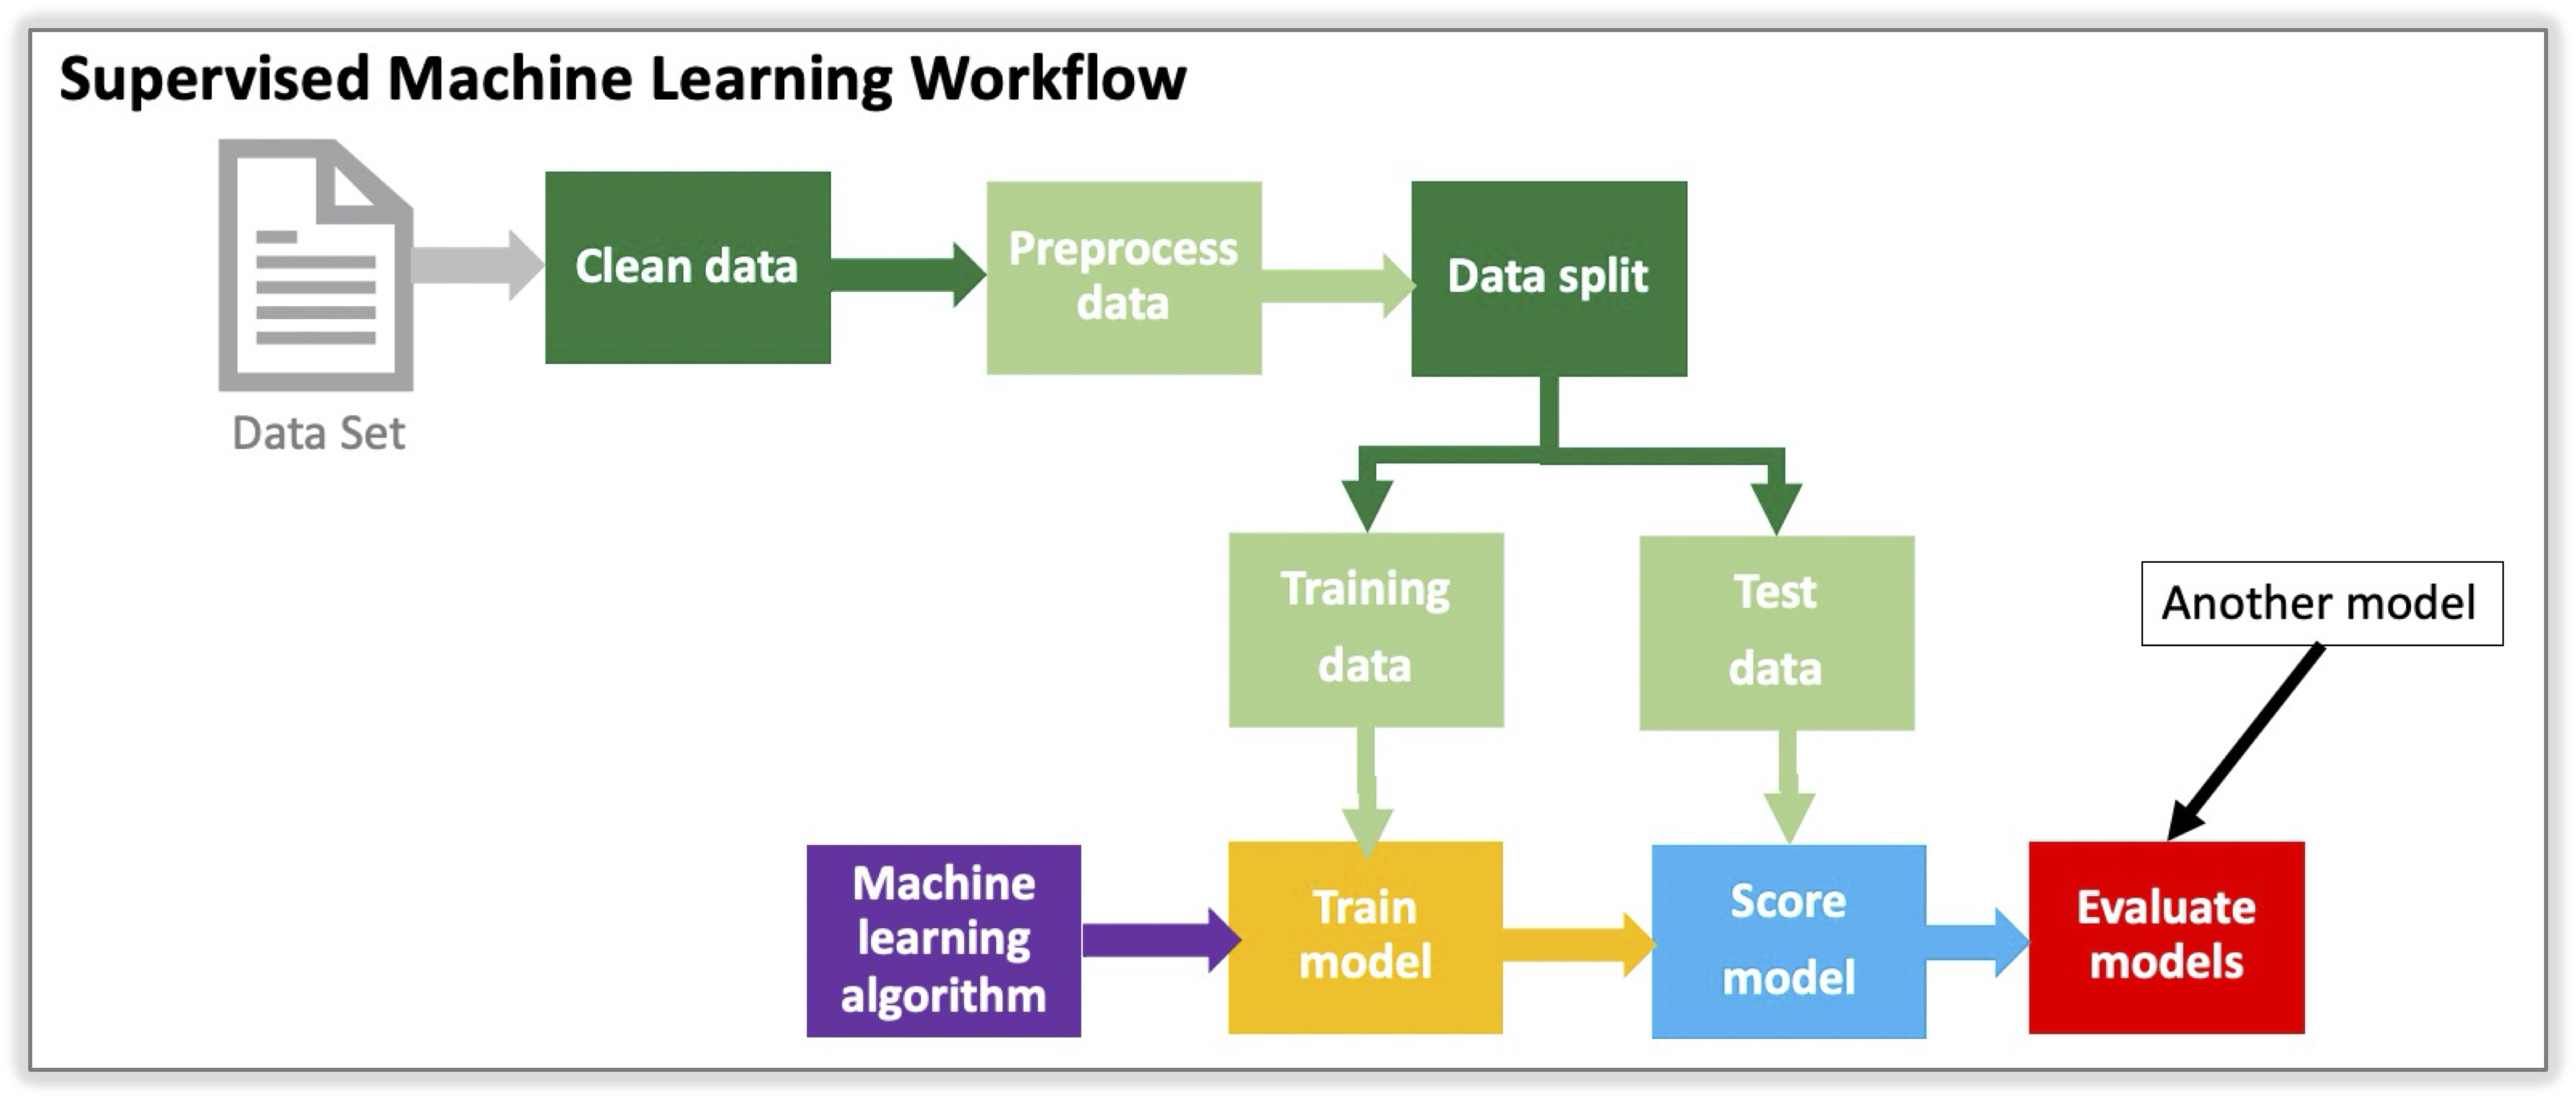

## STEP 1: Import Libraries 
-	import pandas and numpy libraries
-	import scatter_matrix from pandas.plotting
-	import DecisionTreeRegressor from sklearn.tree
-	import tree from sklearn
-	import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
-	import matplotlib
-	import seaborn
-	import pyplot from matplotlib

In [1]:
#Add Your Code Here
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_scoree

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
-	Read the description of the dataset listed below
-	Dataset is provided in the module and assignment. It is called housing_boston.csv.
-	Load the data into Pandas dataframe called df
-	View the first five rows of the dataframe

### Description of Boston Housing Dataset 
We will investigate the Boston House Price dataset as you did with the linear regression homework. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:
*	CRIM: This is the per capita crime rate by town
*	ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq. ft.
*	INDUS: This is the proportion of non-retail business acres per town.
*	CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
*	NOX: This is the concentration of the nitric oxide (parts per 10 million)
*	RM: This is the average number of rooms per dwelling
*	AGE: This is the proportion of owner-occupied units built prior to 1940
*	DIS: This is the weighted distances to five Boston employment centers
*	RAD: This is the index of accessibility to radial highways
*	TAX: This is the full-value property-tax rate per 10,000 dollars
*	PTRATIO: This is the pupil-teacher ratio by town
*	AA: This is calculated as 1000(AA — 0.63)², where AA is the proportion of people of African American descent by town
*	LSTAT: This is the percentage lower status of the population
*	MEDV: This is the median value of owner-occupied homes in $1000s

Note: For this assignment, we use a subset of the original dataset.

*	CRIM: per capita crime rate by town
*	INDUS: proportion of non-retail business acres per town
*	TAX: full-value property-tax rate per 10,000 dollars
*	MEDV: Median value of owner-occupied homes in 1000 dollars.

In [2]:
#Add Your Code Here
housingfile = 'housing_boston.csv'

In [6]:
#Add Your Code Here
df = pd.read_csv(r'C:\UNT\Courses\ADTA 5340\Assignment\Week 6\housing_boston.csv', encoding = 'unicode_escape',header=None)

In [7]:
#Add Your Code Here
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
'TAX', 'PTRATIO', 'AA','LSTAT', 'MEDV']

In [12]:
#Add Your Code Here
df = pd.read_csv(r'C:\UNT\Courses\ADTA 5340\Assignment\Week 6\housing_boston.csv', names=names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

       AA  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset </font>

## STEP 3: Clean the data
-	Find and Mark Missing Values 
-	If there are no missing data points, then proceed to Step 4.

In [13]:
#Add Your Code Here
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
#Add Your Code Here
df2= df[['CRIM','INDUS', 'TAX','MEDV']]

In [15]:
#Add Your Code Here
df2.head()

CRIM  INDUS  TAX  MEDV
0  0.00632   2.31  296  24.0
1  0.02731   7.07  242  21.6
2  0.02729   7.07  242  34.7
3  0.03237   2.18  222  33.4
4  0.06905   2.18  222  36.2

## STEP 4: Performing the Exploratory Data Analysis (EDA) 
-	Print a count of the number of rows (observations) and columns (variables)
-	Print the data types of all variables
-	Print a summary statistics of the data

In [16]:
#Add Your Code Here
print(df2.shape)

(452, 4)


In [17]:
#Add Your Code Here
print(df2.dtypes)

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object


In [18]:
#Add Your Code Here
print(df2.describe())

             CRIM       INDUS         TAX        MEDV
count  452.000000  452.000000  452.000000  452.000000
mean     1.420825   10.304889  377.442478   23.750442
std      2.495894    6.797103  151.327573    8.808602
min      0.006320    0.460000  187.000000    6.300000
25%      0.069875    4.930000  276.750000   18.500000
50%      0.191030    8.140000  307.000000   21.950000
75%      1.211460   18.100000  411.000000   26.600000
max      9.966540   27.740000  711.000000   50.000000


## STEP 4A: Create Histograms 
-	Create histograms for each variable from the dataframe df with a figure size of 14 x 12
-	Plot the histograms

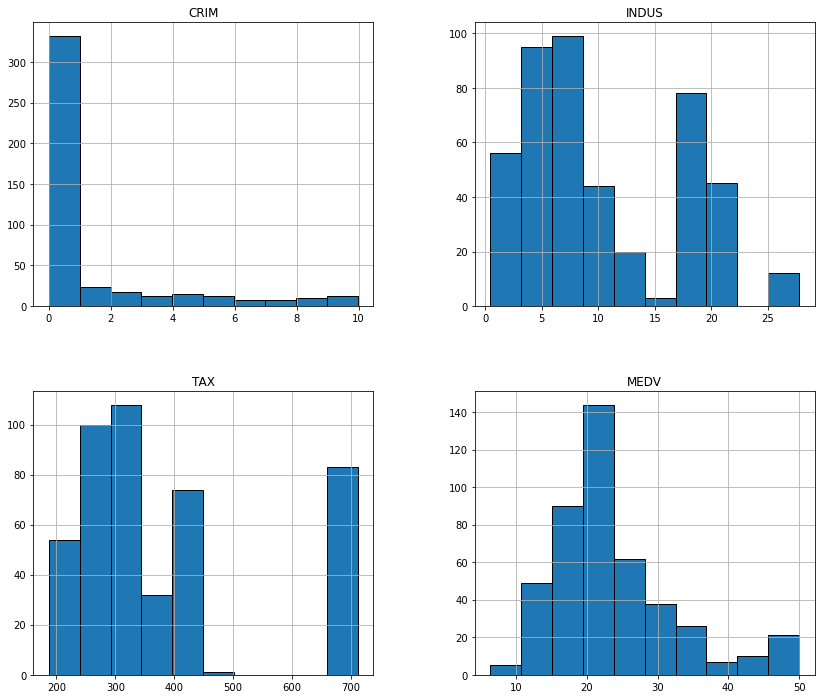

In [19]:
#Add Your Code Here
df2.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## STEP 4B: Create Scatter Plots 


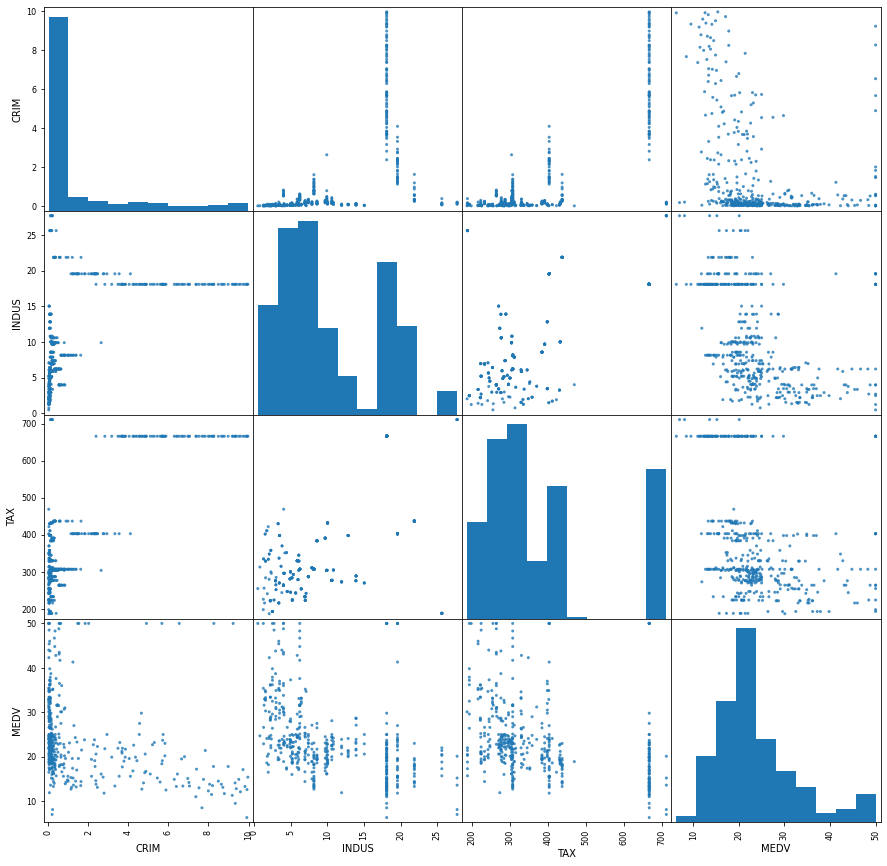

In [20]:
#Add Your Code Here
scatter_matrix(df2, alpha=0.8, figsize=(15, 15))
plt.show()

## STEP 4C: Join Plots with Seaborn 

IMPORTANT NOTE: You can find more information on joint plots here http://seaborn.pydata.org/generated/seaborn.jointplot.html

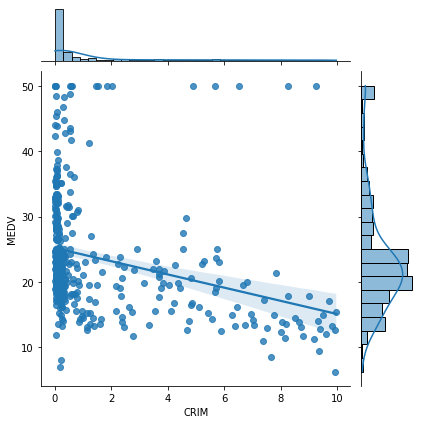

In [21]:
#Add Your Code Here
sns.jointplot(data=df2, x="CRIM", y="MEDV", kind="reg")

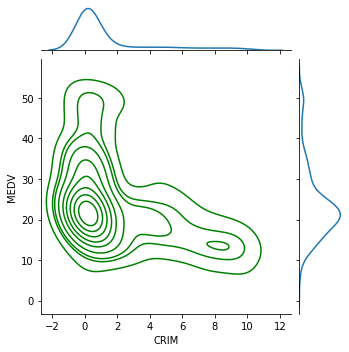

In [22]:
#Add Your Code Here
sns.jointplot(x = 'CRIM', y = 'MEDV', data = df2, kind = 'kde', height = 5, 
joint_kws={'color':'green'})
plt.show()

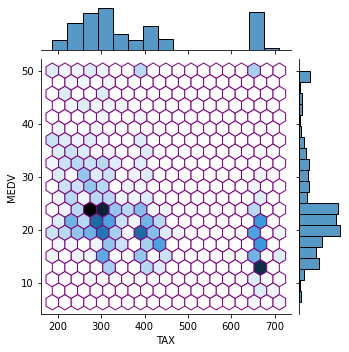

In [23]:
#Add Your Code Here
sns.jointplot(x = 'TAX', y = 'MEDV', data = df2, kind = 'hex', height = 5, 
joint_kws={'color':'purple'})
plt.show()

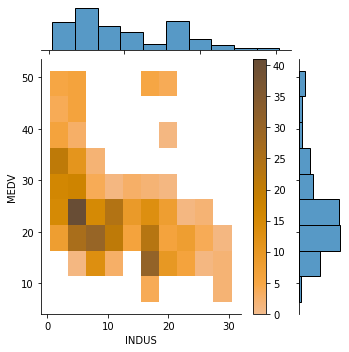

In [24]:
#Add Your Code Here
sns.jointplot(x = 'INDUS', y = 'MEDV', data = df2, kind = 'hist', height = 5, 
joint_kws={'color':'orange'}, binwidth=(3,5), cbar=True)
plt.show()

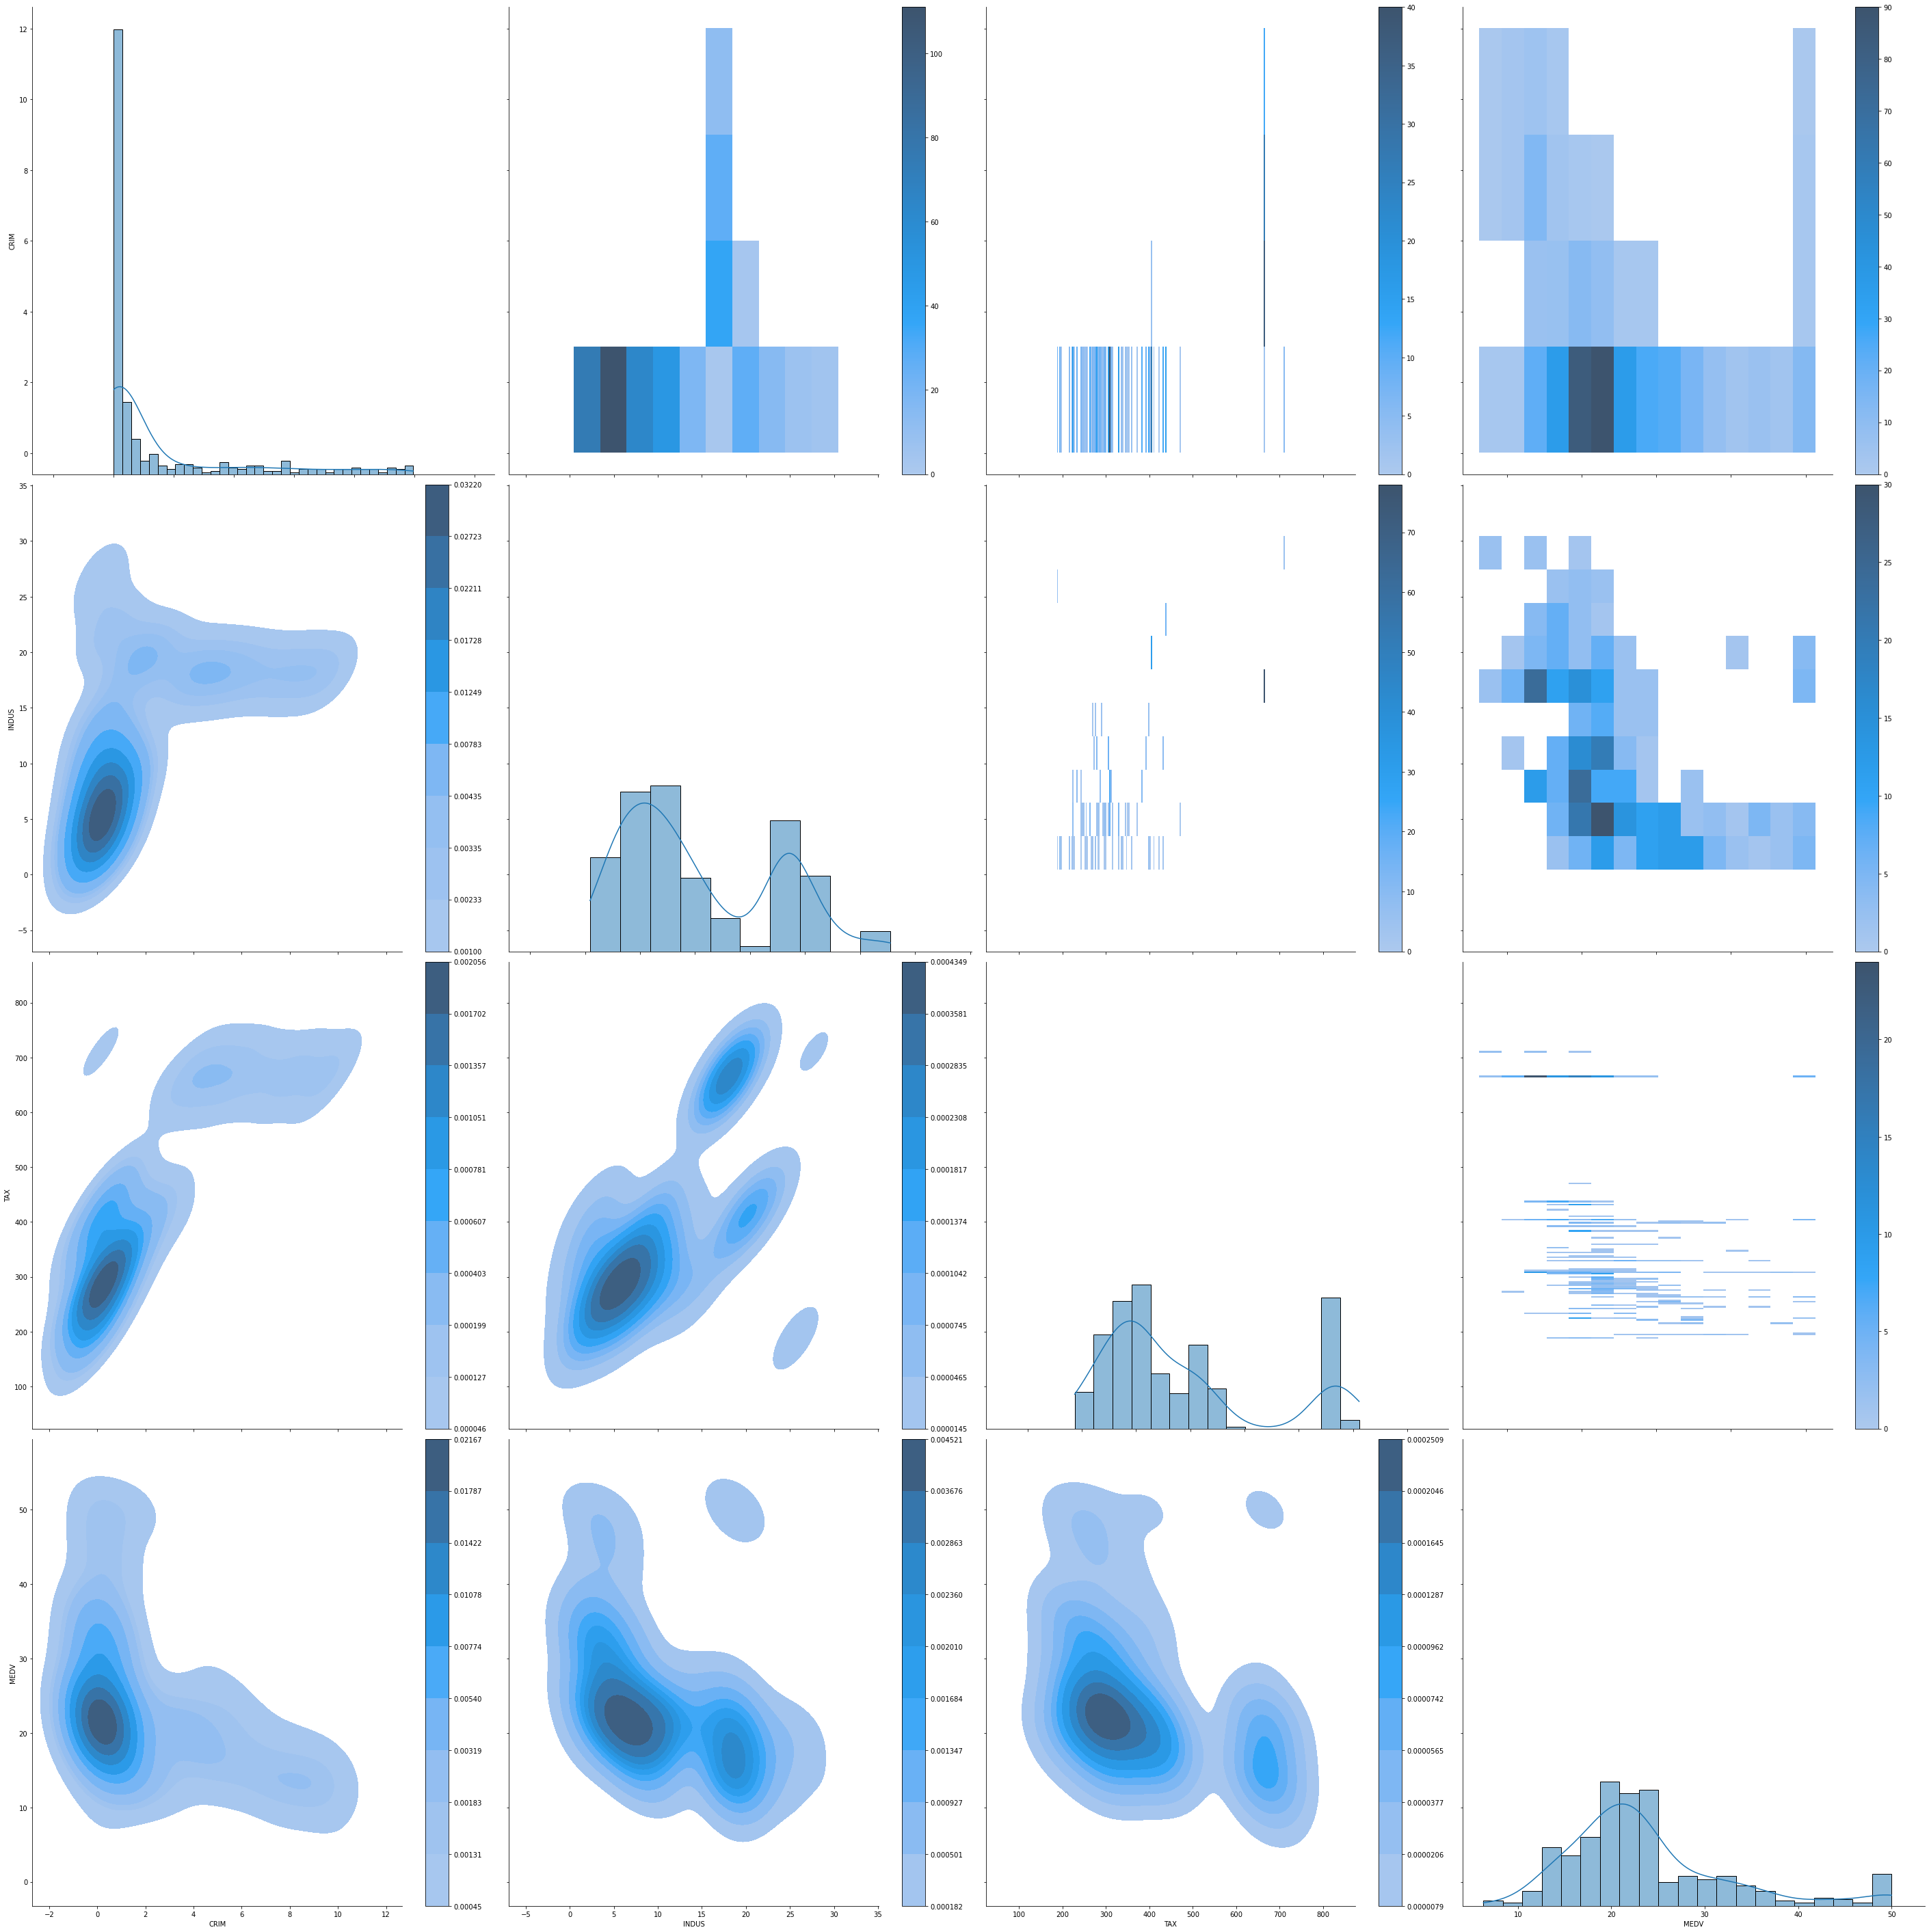

In [25]:
#Add Your Code Here
g = sns.PairGrid(df2, height= 10)
g.map_upper(sns.histplot, bins= 20, binwidth=3, cbar=True)
g.map_lower(sns.kdeplot, fill=True, cbar=True)
g.map_diag(sns.histplot, kde=True, cbar=True)

## <font color=grey> WORKFLOW: DATA SPLIT </font>

## STEP 5: Separate the Dataset into Input & Output NumPy Arrays 
-	Store the dataframe d2 values into a NumPy array
-	Separate the array into input and output components by slicing 

In [27]:
#Add Your Code Here
# Store the dataframe values into a numPy array
array = df2.values
# Separate the array into input and output components by slicing (you used this in your Python fundamental homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3
X = array [:, 0:3]
# For Y (output) [:3] --> All the rows in the last column (MEDV)
Y = array [:,3]

## STEP 6: Split into Input/Output Array into Training/Testing Datasets 
-	Split the dataset into training at 67% and test at 33% with the seed = 7


In [29]:
#Add Your Code Here
# Split the dataset --> training sub-dataset: 67%, and test sub-dataset: 33%
test_size = 0.33
# Selection of records to inclue in which sub-dataset must be done randomly -use the for seed radomization
seed = 7
# Split the dataset (both input & output) into training/testing datasets
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, 
random_state=seed)

## <font color=grey> WORKFLOW: TRAIN MODEL </font>

## STEP 7: Build and Train the Model 
-	Assign DecisionTreeRegressor to the model
-	Train the model 
-	Print output


In [30]:
#Add Your Code Here
model = DecisionTreeRegressor(random_state=seed)

In [33]:
#Add Your Code Here
model.fit(X_train,Y_train)
DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None, 
max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_split=100, 
min_weight_fraction_leaf=0.0, random_state=seed, splitter='best')

DecisionTreeRegressor(criterion='mse', min_samples_split=100, random_state=7)

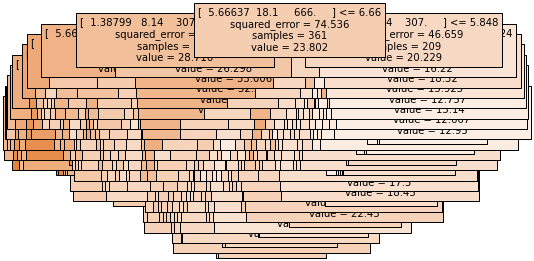

In [34]:
#Add Your Code Here
#Plot tree
tree.plot_tree(model, feature_names=X_train, class_names=Y_train, filled = 
True, fontsize=10)
plt.show()

## <font color=grey> WORKFLOW: SCORE MODEL </font>

## STEP 8: Calculate R-Squared 
-	Calculate the R-Squared 
-	Print the score

** Note: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable, which is very low. Think about how you could increase the R-squared. What variables would you use? 

In [35]:
#Add Your Code Here
R_squared = model.score(X_test, Y_test)
print('R-Squared = ', R_squared)

R-Squared =  0.24948500553354236


## Step 9: Prediction 
-	Execute model prediction
-	We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV). 

We are using the following predictors for the 1st prediction: 
*	CRIM: per capita crime rate by town: 12
*	INDUS: proportion of non-retail business acres per town: 10
*	TAX: full-value property-tax rate per $10,000: 450

Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $12,600. 

We are using the following predictors for the 2nd prediction: 
*	CRIM: per capita crime rate by town: 2
*	INDUS: proportion of non-retail business acres per town: 30
*	TAX: full-value property-tax rate per $10,000: 50

Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $15,700. 

In [36]:
#Add Your Code Here
model.predict([[12,10,450]])

array([12.6])

In [37]:
#Add Your Code Here
model.predict([[2,30,50]])

array([15.7])

## <font color=grey> WORKFLOW: EVALUATE MODELS </font>

## Step 10: Train & Score Model 2 Using K-Fold Cross Validation Data Split
-	Specify the k-size to 10
-	Fix the random seed to 7
-	Split the entire data set
-	Obtain score
-	Train the model and run K-fold cross-validation
-	Print results

In [38]:
#Add Your Code Here
# Evaluate the algorithm
# Specify the K-size
num_folds = 10
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'neg_mean_squared_error'

In [41]:
#Add Your Code Here
# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation
print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -76.82251835748792


Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us.  This value would traditionally be a positive value but scikit reports this value as a negative value. If you want a positive number, you may calculate the square root of the Negative Mean Squared Error value.

<hr style="border:5px solid green"> </hr>

# <center><font color=green>Part 2: k-Nearest Neighbors (kNN) </font> </center> 

## Supervised Machine Learning k-Nearest Neighbors (kNN)
•	Let's begin Part 2 using the same Supervised Learning Workflow used in part 1.

## STEP 1: Import Libraries 
-   import pandas and numpy libraries
-	import scatter_matrix from pandas.plotting
-	import matplotlib
-	import seaborn
-	import pyplot from matplotlib
-	import KNeighborsClassifier from sklearn.neighbors
-	import train_test_split, KFold, and cross_val_score from sklearn.model_selection 
-	import classification_report from sklearn.metrics 

In [42]:
#Add Your Code Here
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#Add Your Code Here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

## <font color=grey> WORKFLOW: DATA SET </font>

## STEP 2: Read data description and Load the Data
-	Read the description of the dataset listed below
-	Dataset is provided in the module and assignment. It is called iris.csv.
-	Load the data into Pandas dataframe called df
-	View the first five rows of the dataframe

## Description Iris Dataset 
Data Set: iris.csv 

Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

- Creator: RA_ Fisher
- Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
- Date: 1988

Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

Predicted attribute: class of Iris plant

Number of Instances: 150 (50 in each of three classes)

Number of predictors: 4 numeric

Predictive attributes and the class attribute information:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

class:   

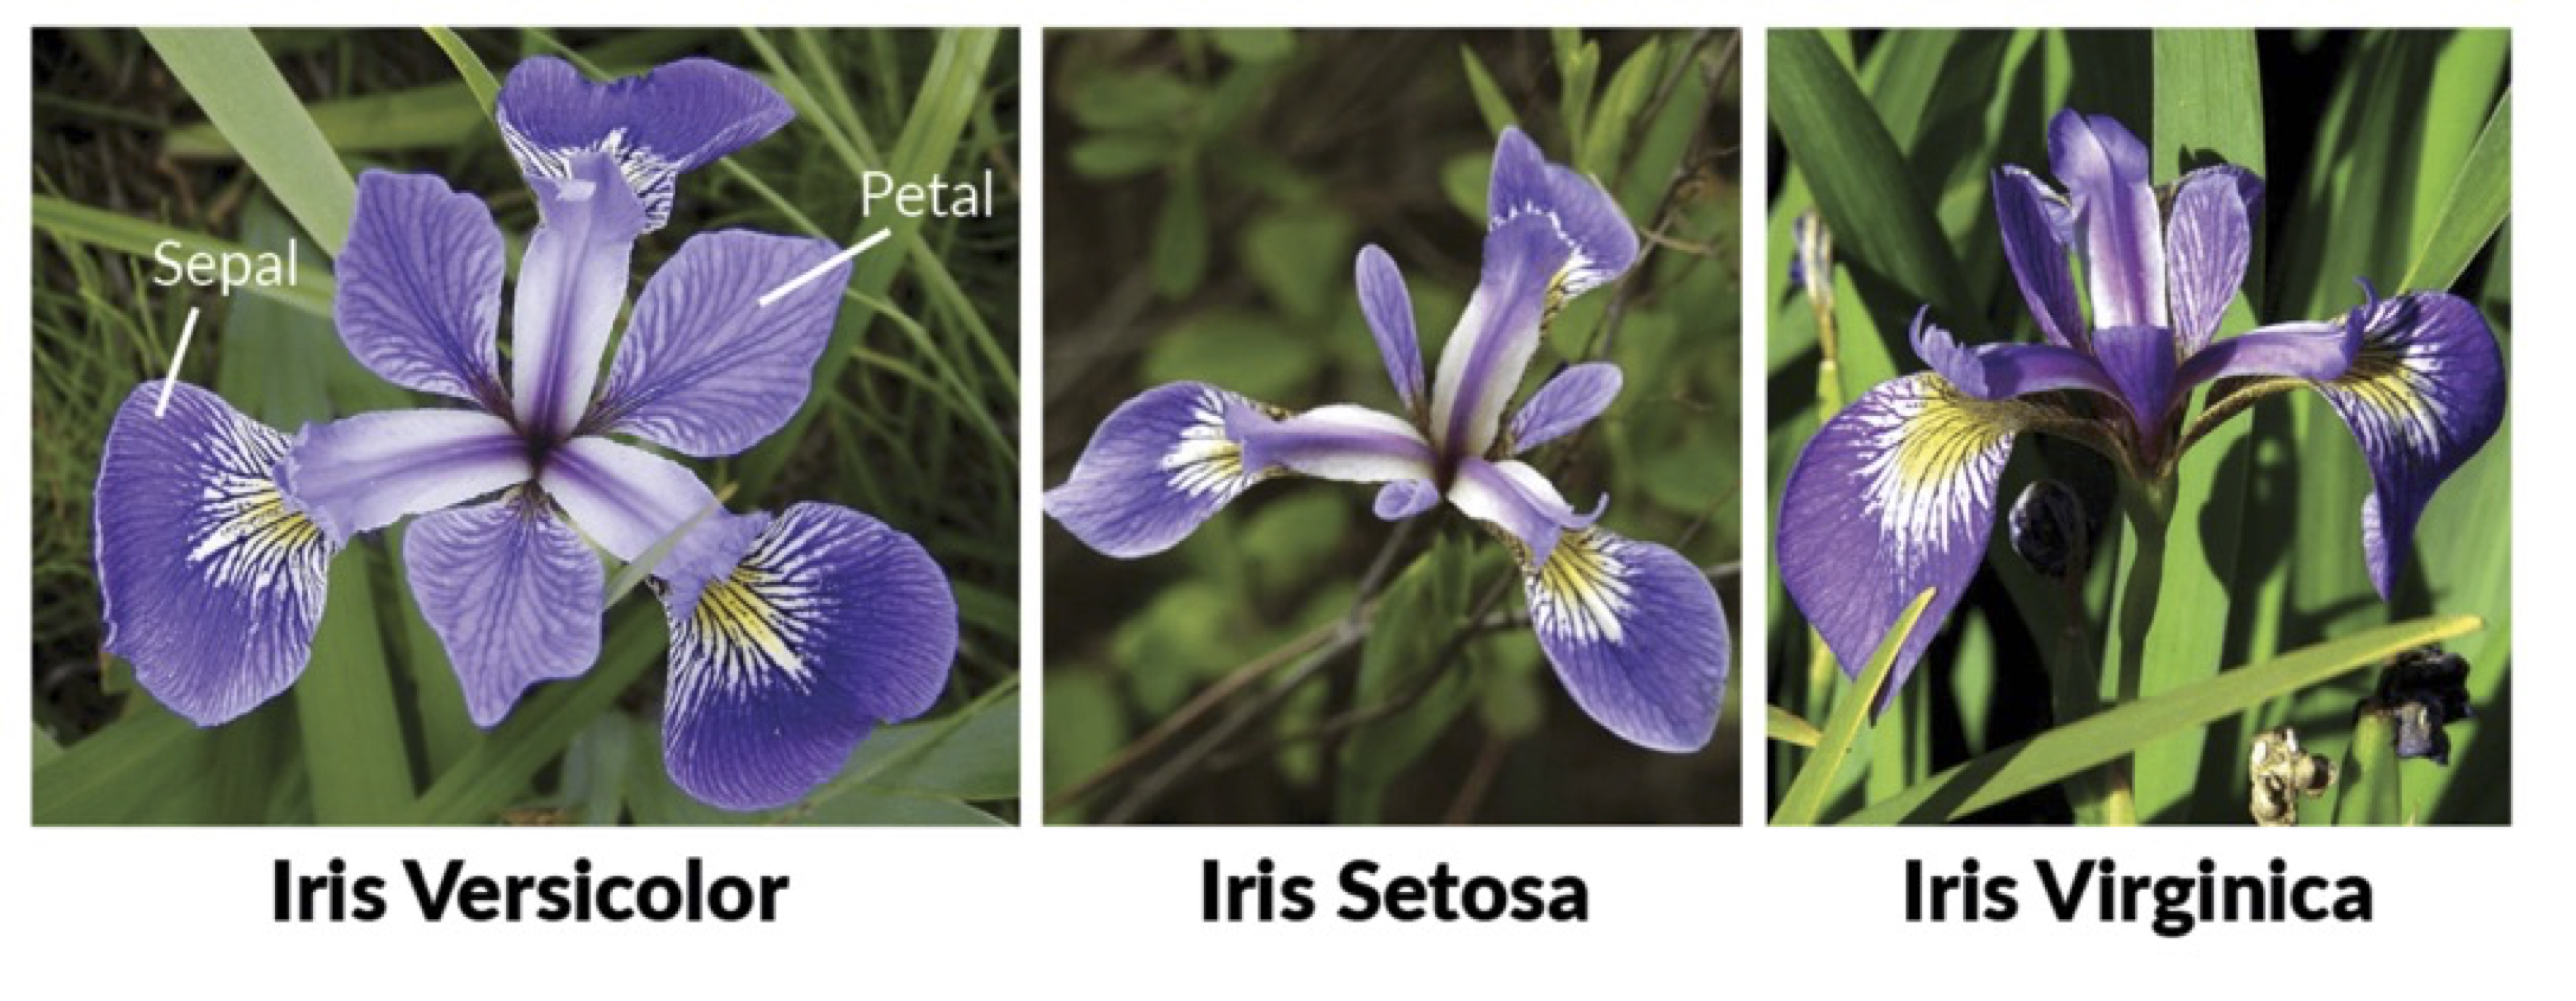

In [44]:
#Add Your Code Here
# Specify location of the dataset
filename = 'iris.csv'


In [49]:
#Add Your Code Here
# Load the data into a Pandas DataFrame
df = pd.read_csv(r'C:\UNT\Courses\ADTA 5340\Assignment\Week 6\iris.csv',encoding = 'unicode_escape')

## <font color=grey> WORKFLOW: Clean and Preprocess the Dataset  </font>

## STEP 3: Clean the data
-	Find and Mark Missing Values 
-	If there are no missing data points, then proceed to Step 4.


In [50]:
#Add Your Code Here
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' 
]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## STEP 4: Performing the Exploratory Data Analysis (EDA) 
-	Print a count of the number of rows (observations) and columns (variables)
-	Print the data types of all variables
-   Print the first five records
-	Print a summary statistics of the data
-	Print the number of records in each class

In [51]:
#Add Your Code Here
print(df.shape)

(150, 6)


In [52]:
#Add Your Code Here
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [53]:
#Add Your Code Here
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [54]:
#Add Your Code Here
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [55]:
#Add Your Code Here
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## STEP 4A: Create Histograms 
-	Create histograms from the dataframe df that is black with a figure size of 12 x 8
-	Plot the histograms


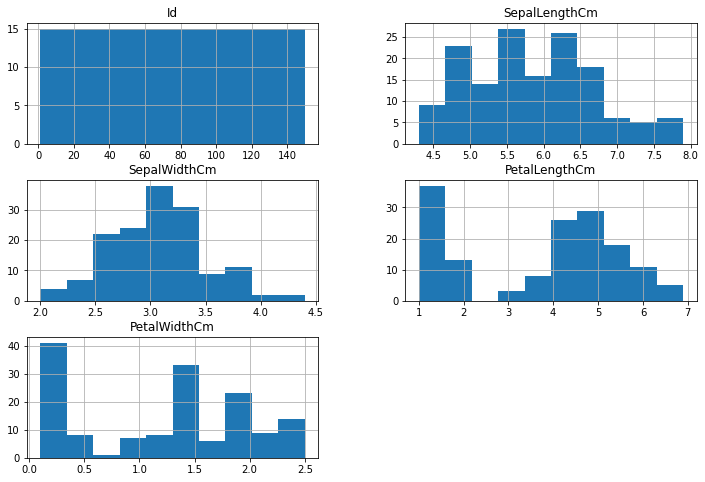

In [56]:
#Add Your Code Here
df.hist(figsize=(12, 8))
pyplot.show()

## Step 4B: Density plots 
-	Create density plots from the dataframe df 

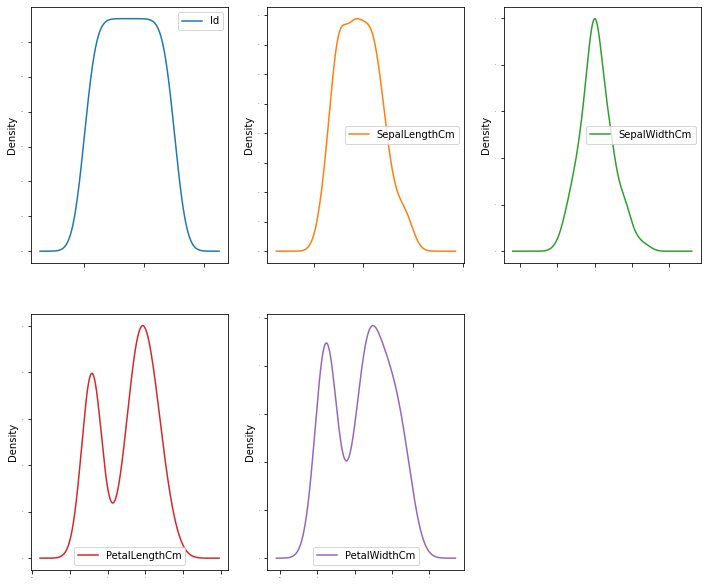

In [57]:
#Add Your Code Here
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, 
legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

## Step 4C: Create Boxplots
-	Create Boxplots


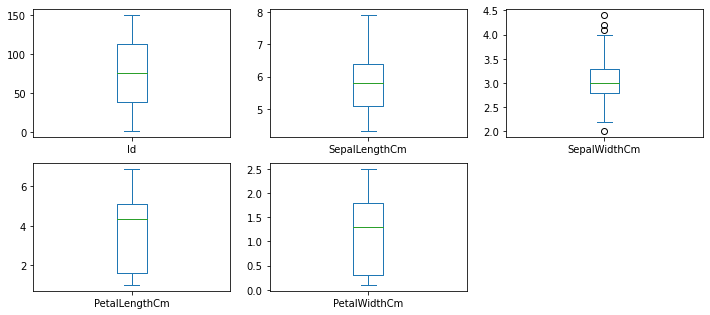

In [58]:
#Add Your Code Here
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, 
figsize=(12,8))
pyplot.show()

## Step 4D: Create Scatter plots
-	Create Scatter plots

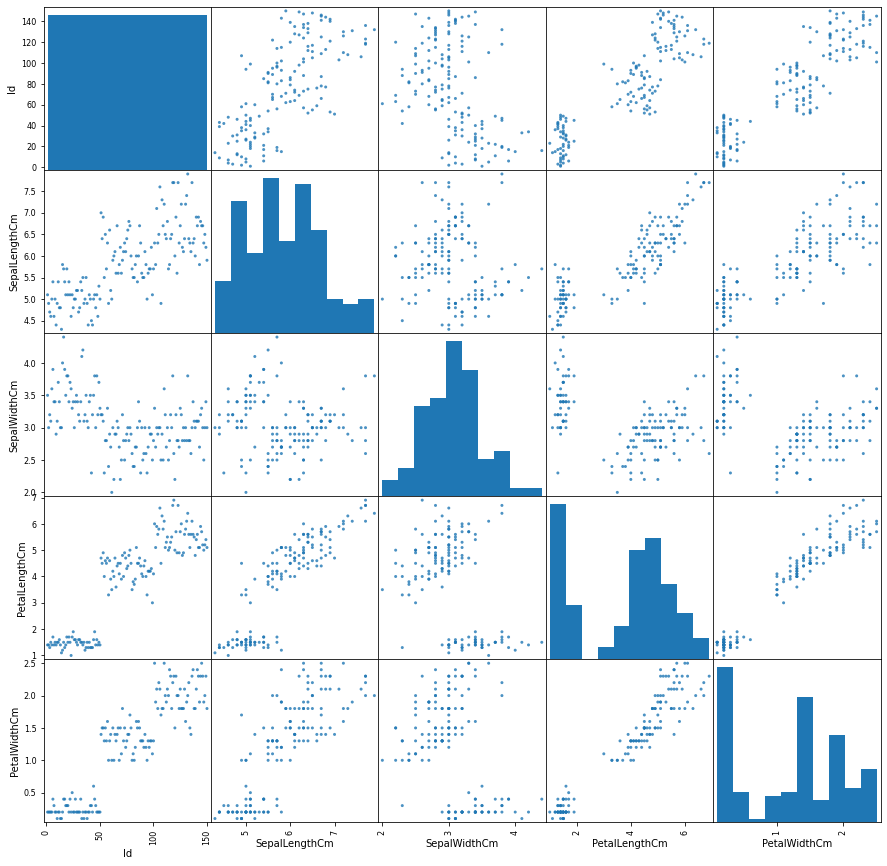

In [59]:
#Add Your Code Here
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

## <font color=grey> WORKFLOW: DATA SPLIT  </font>

## STEP 5: Separate the Dataset into Input & Output NumPy Arrays 
-	Store the dataframe values into a NumPy array
 

In [60]:
#Add Your Code Here
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

## STEP 6: Split into Input/Output Array into Training/Testing Datasets 
-	Split the dataset into training at 67% and test at 33% with the seed = 7


In [62]:
#Add Your Code Here
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7

In [63]:
#Add Your Code Here
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
test_size=test_size,
random_state=seed)

## <font color=grey> WORKFLOW: TRAIN MODEL  </font>

## STEP 7: Build and Train the Model 
-	Assign kNN to the model
-	Train the model 
-	Print the classification report

In [64]:
#Add Your Code Here
model = KNeighborsClassifier()

In [65]:
#Add Your Code Here
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [66]:
#Add Your Code Here
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



## <font color=grey> WORKFLOW: SCORE MODEL 1  </font>

## STEP 8: Score the Accuracy of the Model 
-	Calculate accuracy score 
-	Print the score

In [68]:
#Add Your Code Here
#Add Your Code Here
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


## Step 9: Prediction 
-	Execute model prediction

Note: We have now trained the model and using that trained model to predict the type of flower we have with the listed values for each variable. 

In [69]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

## <font color=grey> WORKFLOW: EVALUATE MODELS  </font>

## Step 10: Train & Score Model 2 Using K-Fold Cross Validation Data Split
-	Specify the k-size to 10
-	Fix the random seed to 7
-	Split the entire data set
-	Obtain the accuracy level
-	Train the model and run K-fold cross-validation
-	Print results


In [70]:
#Add Your Code Here
# evaluate the algorithm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

In [71]:
#Add Your Code Here
# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

In [72]:
#Add Your Code Here
kfold = KFold(n_splits, random_state=seed, shuffle=True)

In [73]:
#Add Your Code Here
scoring = 'accuracy'

In [74]:
#Add Your Code Here
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

In [75]:
#Add Your Code Here
# print the evaluation results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.953 (0.052)


## GREAT JOB! YOU ARE DONE.